# Myntra Fashion Product Analysis

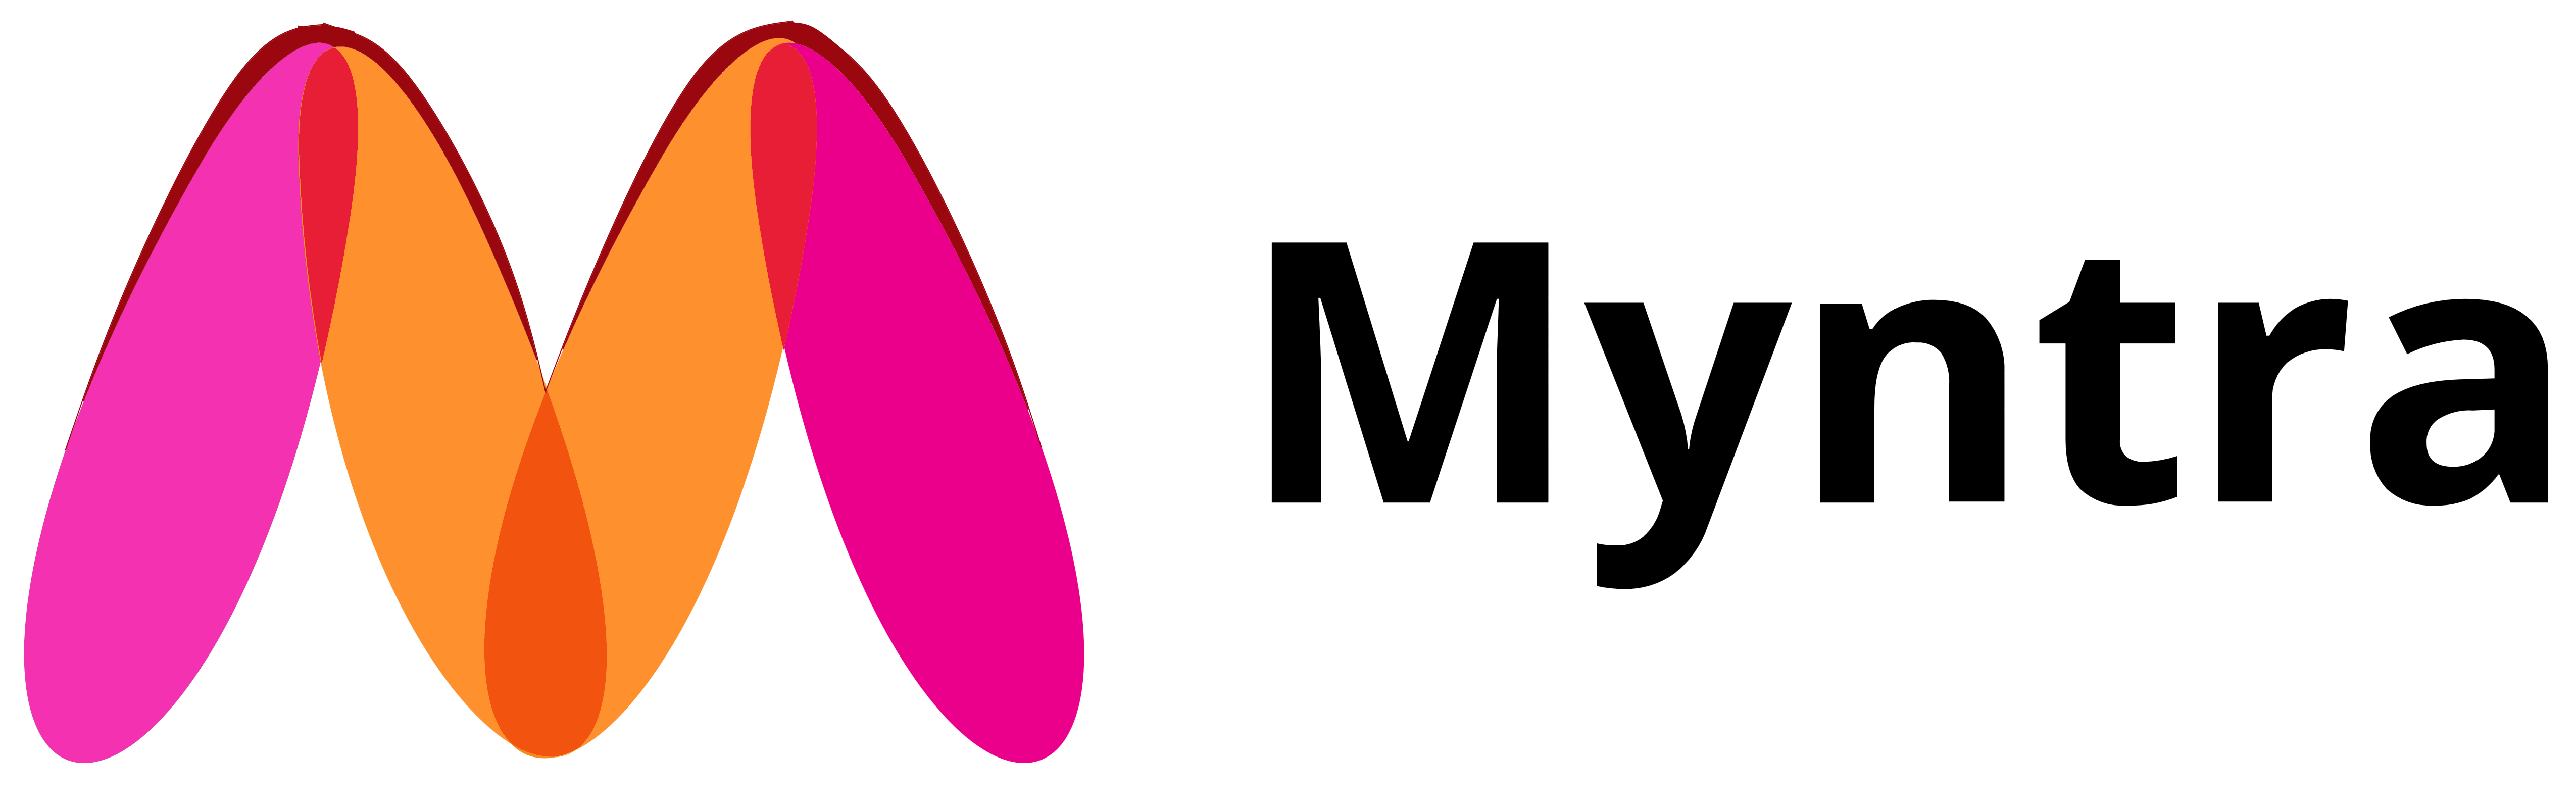

# Overview : Myntra(Online Fashion Stores)

#### Company Ethos   : A Fashion & Lifestyle Company
#### Parent Company  : Flipkart-Walmart
#### CEO                       : Mr. Aman Nagaram
#### Target Segment    : Mass premium, Urban 18-35 yrs. Men + Women
#### Categories            : Home, Beauty & Lifestyle Products

# About Myntra :
#### Products : 5L+
#### Brands    : 5000+
#### Sellers    : 2000+
#### Return policy : 15 days
#### App store download : 50M+
#### App store rating : 4.4

## When it comes to shopping it goes without saying that girls are the best shoppers. Is it true or not ? Let’s find out. 



Here we will take a part of the Myntra fashion product data and  try to find some insights.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df=pd.read_csv('myntra.csv')

Let's have a look at the dataset

In [6]:
df.head(5)

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


Now we check if there is any null value present in our dataset

In [ ]:
df.isnull().sum()

PrimaryColor is the only column with null values. We can fill these null values with 'others'

In [ ]:
#The NULL in PrimaryColor is simply filled with 'Other'
df['PrimaryColor'] = df['PrimaryColor'].fillna('Other')

In [ ]:
#Converting all strings in dataframe to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
#Removing leading spaces from PrimaryColor column
df['PrimaryColor'] = df['PrimaryColor'].str.lstrip()

Firstly we will checkout the various brands available

In [9]:
print("Categories in Gender: ",df.ProductBrand.unique())

Categories in Gender:  ['DKNY' 'EthnoVogue' 'SPYKAR' 'Raymond' 'Parx' 'SHOWOFF' 'Kenneth Cole'
 'Police' 'Vishudh' 'Being Human' 'Homesake' 'SEJ by Nisha Gupta'
 'YAK YAK' 'PARFAIT' 'Michael Kors' 'HIGHLANDER' 'JEWEL JUNCTION' 'ID'
 'Story@home' 'Gini and Jony' 'Sera' 'AccessHer' 'Alcis'
 'Difference of Opinion' 'Tokyo Talkies' 'ANNA SUI' 'her by invictus'
 'Soie' 'Lara Karen' 'Urban Dog' 'ahilya' 'VASTRAMAY' 'Campus Sutra'
 'FIDO DIDO' 'MIAH Decor' 'BuckleUp' 'Peter England' 'AIGNER' 'Lady Lyka'
 'Park Avenue' 'Roadster' 'U.S. Polo Assn. Denim Co.' 'Sweet Dreams'
 'Kazo' 'Stylo Bug' 'Bvlgari' 'Qraa Men' 'GAS' 'WITH' 'ZUSH'
 'JBN Creation' 'U.S. Polo Assn. Kids' 'DressBerry' 'ColorPlus' 'Lakme'
 'Allen Solly Woman' 'Palm Tree' 'Arrow' 'DAVID BECKHAM' 'MANGO' 'Carrera'
 'ROMEE' 'TAYHAA' 'Ishin' 'Shoe Couture' 'HARBORNBAY' 'Keds' 'Rozia'
 'Aj DEZInES' 'Monte Carlo' 'even' 'ether' 'Crimsoune Club'
 'Russell Athletic' 'MIMOSA' 'Puma' 'Blackberrys' 'Playdate' 'Rocia'
 'Marvel by Wear Your M

Now let's checkout what are the diffrent types of categories in Gender column

In [15]:
number_of_unique_brand= len(pd.unique(df['ProductBrand']))
number_of_unique_brand

677

In [4]:
print("Categories in Gender: ",df.Gender.unique())

Categories in Gender:  ['Unisex' 'Women' 'Men' 'Boys' 'Girls' 'Unisex Kids']


Next we will checkout the diffrent colour options available 

In [5]:
print("\n Categories in PrimaryColor: ",df.PrimaryColor.unique())


 Categories in PrimaryColor:  [' Black' ' Beige' ' Pink' 'Blue' ' White' ' Brown' ' Burgundy' ' Red'
 ' Green' nan ' Maroon' ' Navy' ' Gold' ' Yellow' ' Grey' ' Platinum'
 ' Silver' ' Khaki' ' Mustard' ' Lavender' ' Matte' ' Rose' ' Charcoal'
 ' Purple' ' Orange' ' Peach' ' Magenta' ' Bronze']


Next let's checkout the price range available on myntra

In [22]:
print("max price : ",df['Price (INR)'].max())
print("min price : ",df['Price (INR)'].min())
print("mean price : ",df['Price (INR)'].mean())

max price :  63090
min price :  90
mean price :  1452.6609558882396


# Data Visualisation

### Top 10 brands

<AxesSubplot:title={'center':'Top 10 popular brands'}>

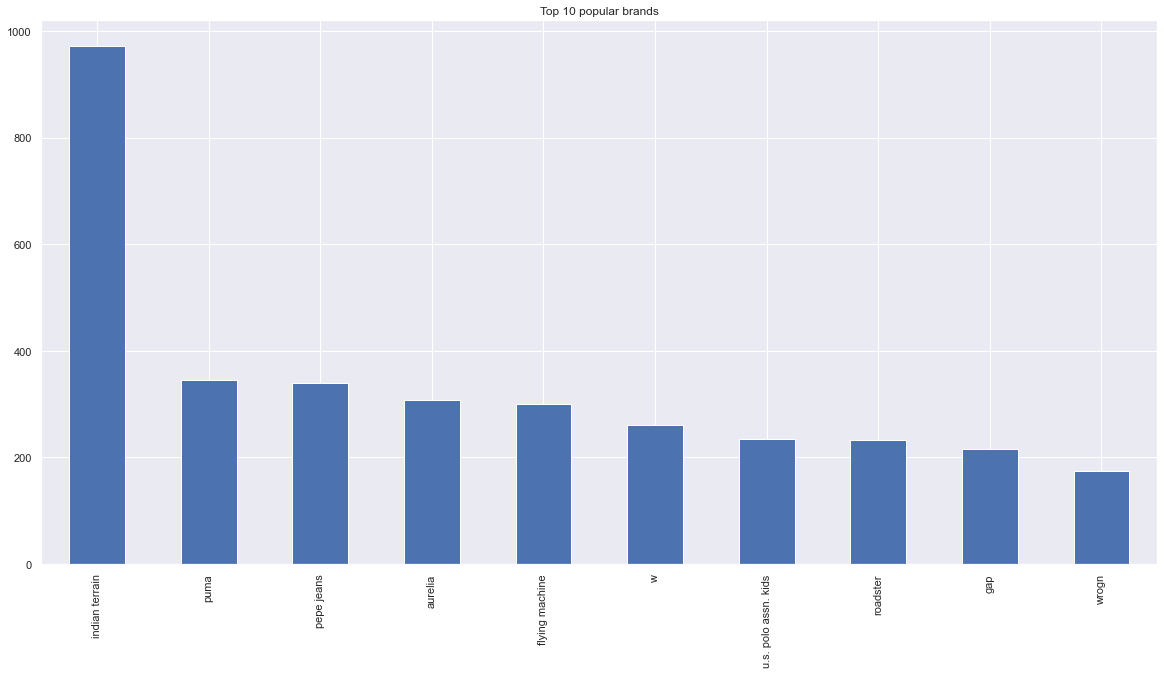

In [32]:
df.ProductBrand.value_counts()[:10].plot(kind= 'bar', title = 'Top 10 popular brands')

### Top 10 Expensive Brand

<AxesSubplot:xlabel='ProductBrand'>

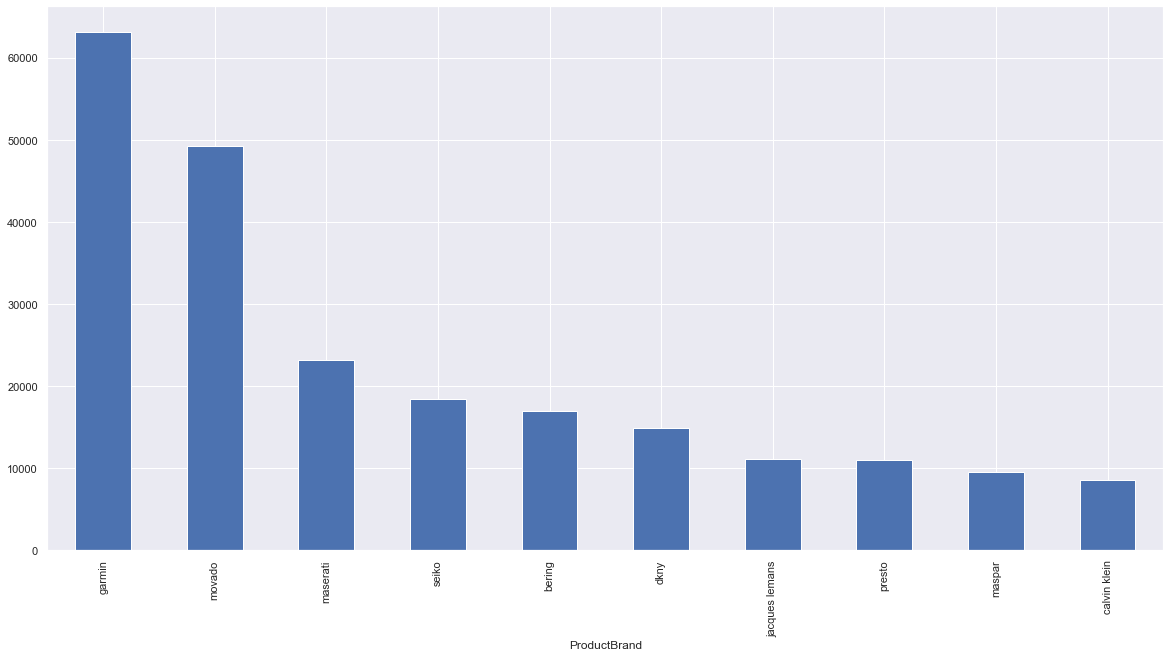

In [34]:
df1=df.groupby('ProductBrand')['Price (INR)'].mean().sort_values(ascending=False).head(10)
df1.plot.bar()

### Let's See products belong to which category according to gender

<AxesSubplot:ylabel='ProductID'>

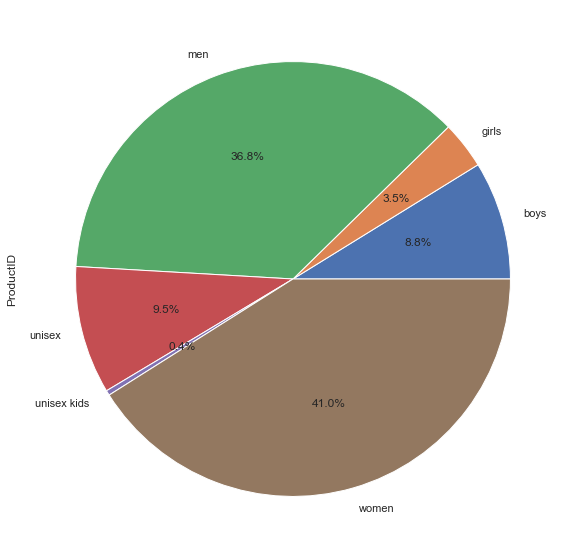

In [36]:
df.groupby('Gender')['ProductID'].count().plot.pie(autopct="%1.1f%%")

The plot says that most of the products in the data are for women

### Most preferable color

<AxesSubplot:xlabel='PrimaryColor'>

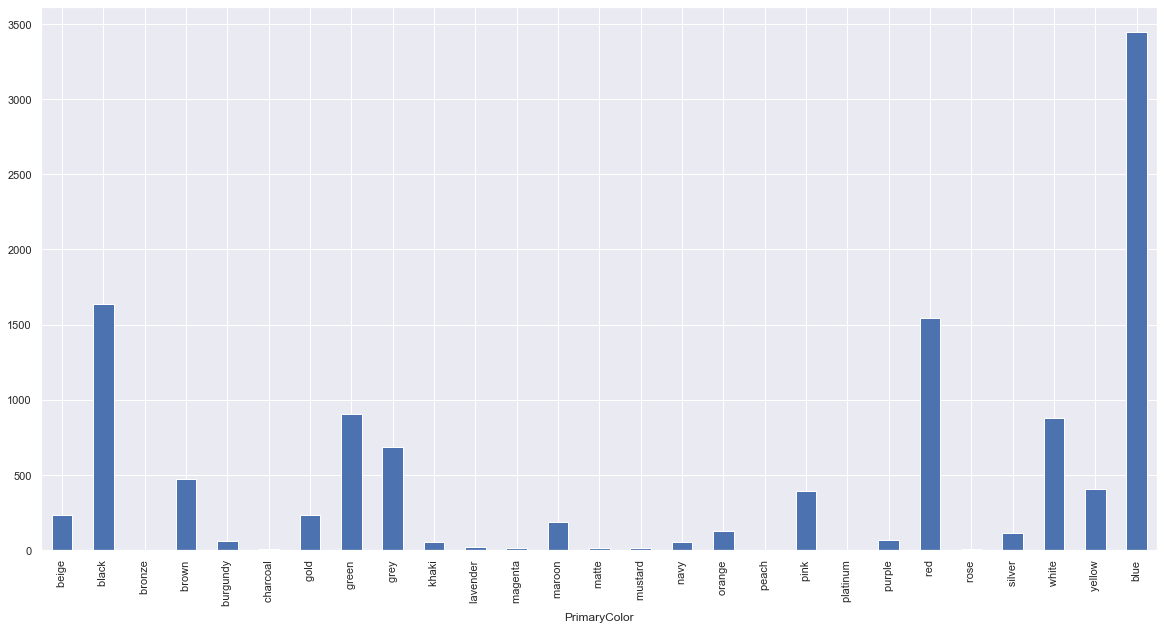

In [30]:
df.groupby('PrimaryColor')['ProductID'].count().plot.bar()